In [0]:
# import required dependencies
from keras import backend as k
from keras.datasets import mnist
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [116]:
batch_size = 128
num_classes = 10
epoch = 12
image_row, image_col = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (60000, 28, 28, 1)
y_train shape :  (60000, 10)
x_test shape :  (10000, 28, 28, 1)
y_test shape :  (10000, 10)


In [117]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), 
activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
__________

In [118]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epoch,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
60000/60000 [==============================] - 9s 157us/step - loss: 1.5422 - acc: 0.8501
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.1132 - acc: 0.9679
Epoch 3/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0837 - acc: 0.9759
Epoch 4/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0639 - acc: 0.9818
Epoch 5/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0541 - acc: 0.9840
Epoch 6/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0491 - acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0421 - acc: 0.9876
Epoch 8/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0382 - acc: 0.9888
Epoch 9/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0345 - acc: 0.9899
Epoch 10/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0320 - a

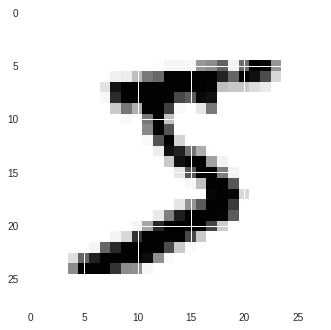

In [141]:
plt.imshow(x_train[0].reshape((28,28)))
plt.show()

In [142]:
np.argmax(model.predict(x_train[0].reshape(1,28,28,1)))

5